In [34]:
#libraries
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#simulation units
G = 1 #gravity constant
len_sim = 1 #length of simulation in parsec
mass_unit = 1 #mass unit in solar masses
T_sim = 14.9 * np.sqrt((len_sim**3)/mass_unit) #time unit conversion in Myr
vel_sim = 980.4 * (len_sim/T_sim) #velocity unit conversion in m/s
print(f'Simulation Time: {T_sim}. Simulation Velocity: {vel_sim}.')

Simulation Time: 14.9. Simulation Velocity: 65.79865771812081.


In [36]:
#initial conditions
mass = 1/mass_unit
x, y, z = 10/len_sim, 0/len_sim, 0/len_sim
r = np.sqrt(x*x + y*y + z*z)
v_circ = np.sqrt((G*mass)/r) #ya tiene unidades de simulacion
vx, vy, vz = 0/vel_sim, v_circ/3, 0/vel_sim

N_steps = 10**5
t_orbit = ( (2*np.pi*r)/v_circ)
t_end = 10*t_orbit

t, dt = 0, t_end/N_steps

In [37]:
#orbit simulation
x_arr, y_arr, z_arr = np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float)
vx_arr, vy_arr, vz_arr = np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float), np.ones(N_steps, dtype = float)
t_arr = np.ones(N_steps, dtype = float)
r_arr = np.ones(N_steps, dtype = float)
for i in range(0, N_steps):
    x_arr[i], y_arr[i], z_arr[i] = x, y, z
    vx_arr[i], vy_arr[i], vz_arr[i] = vx, vy, vz

    r = np.sqrt(x*x + y*y + z*z)
    r_arr[i] = r
    ax, ay, az = (-(G*mass)/(r**2))*(x/r), (-(G*mass)/(r**2))*(y/r), (-(G*mass)/(r**2))*(z/r)
    vx, vy, vz = vx + ax*dt, vy + ay*dt, vz + az*dt
    x, y, z = x + vx*dt, y + vy*dt, z + vz*dt
    t_arr[i] = t 
    t = i*dt

In [40]:
max_rad = np.where(r_arr > 9.999998)[0]
time_max_pos = t_arr[max_rad]
print(time_max_pos)

[   0.           76.49632965   76.51619882  153.03239765  153.05226682
  229.56846565  229.58833482  306.10453365  306.12440282  382.64060165
  382.66047082  459.17666965  459.19653882  535.71273764  535.73260682
  612.24880564  612.26867482  688.78487364  688.80474282  765.32094164
  765.34081082  841.85700964  841.87687882  918.39307764  918.41294682
  918.432816    994.92914564  994.94901482  994.968884   1071.46521364
 1071.48508282 1071.504952   1148.00128164 1148.02115082 1148.04102
 1224.53734964 1224.55721882 1224.577088   1301.07341764 1301.09328682
 1301.11315599 1377.60948564 1377.62935482 1377.64922399 1454.14555364
 1454.16542282 1454.18529199 1530.68162164 1530.70149082 1530.72135999
 1607.21768964 1607.23755882 1607.25742799 1683.75375764 1683.77362682
 1683.79349599 1760.28982564 1760.30969482 1760.32956399 1836.84576282
 1836.86563199 1913.38183082 1913.40169999]


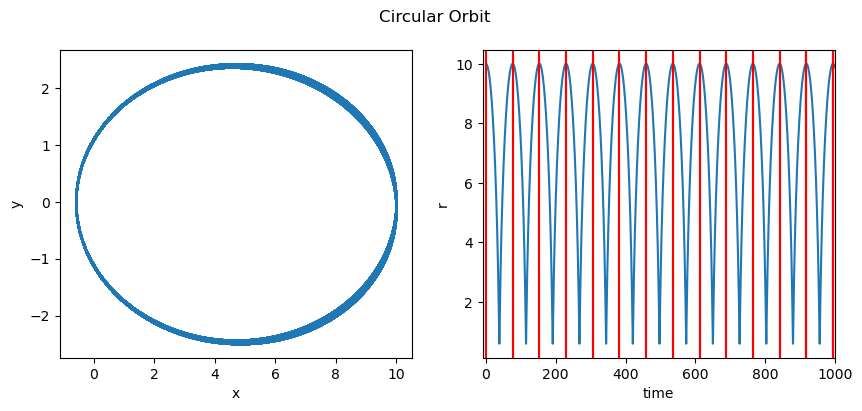

In [48]:
fig = plt.figure(figsize = (10,4))
ax = fig.subplots(1,2)

ax[0].scatter(x_arr, y_arr, s = 1)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(t_arr, r_arr)
ax[1].set_xlabel('time')
ax[1].set_ylabel('r')
ax[1].set_xlim(-10, 1000)
for i in range(len(time_max_pos)):
    ax[1].axvline(time_max_pos[i], color = 'red')

fig.suptitle('Circular Orbit')
plt.show()